In [1]:
import torch
print(torch.__version__)

/Users/mohit/opt/anaconda3/envs/exp_pytorch_only/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


1.10.0


In [2]:
import networkx as nx

In [3]:
G=nx.Graph()
print(G.is_directed())

False


In [4]:
H=nx.DiGraph()
print(H.is_directed())

True


In [5]:
G.graph['Name']='Bar'
print(G.graph)

{'Name': 'Bar'}


In [7]:
G.add_node(0,feature=0,label=0)
node_0_attr=G.nodes[0]
print("Node 0 has the attributes {}".format(node_0_attr))

Node 0 has the attributes {'feature': 0, 'label': 0}


In [14]:
G.add_nodes_from([
  (1, {"feature": 1, "label": 1}),
  (2, {"feature": 2, "label": 2})
])

for node in G.nodes(data=True):
    print(node)
    
num_nodes=G.number_of_nodes()
print('G has {} nodes'.format(num_nodes))

(0, {'feature': 0, 'label': 0})
(1, {'feature': 1, 'label': 1})
(2, {'feature': 2, 'label': 2})
G has 3 nodes


In [17]:
G.add_edge(0,1,weight=0.5)

edge_0_1_attr=G.edges[(0,1)]
print("Edge (0, 1) has the attributes {}".format(edge_0_1_attr))

Edge (0, 1) has the attributes {'weight': 0.5}


In [37]:
G.add_edges_from([
  (1, 2, {"weight": 0.3}),
  (2, 0, {"weight": 0.1}),
  (2,3,  {'weight':0.4})
])

for edge in G.edges(data=True):
    print(edge)
    
num_edges=G.number_of_edges()
print("G has {} edges".format(num_edges))

(0, 1, {})
(1, 0, {})
(1, 2, {'weight': 0.3})
(2, 1, {})
(2, 3, {'weight': 0.4})
(2, 0, {'weight': 0.1})
(3, 2, {})
G has 7 edges


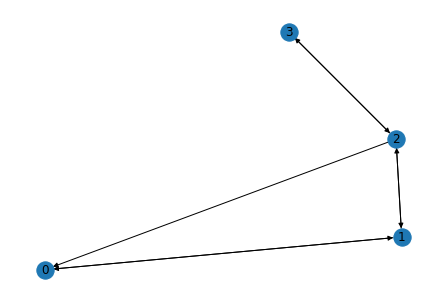

In [38]:
nx.draw(G,with_labels=True)

In [27]:
node_id=1

print('Node {} has {} degrees'.format(node_id,G.degree[node_id]))

for neighbor in G.neighbors(node_id):
    print('Node {} has {} neighbour'.format(node_id, neighbor))

Node 1 has 2 degrees
Node 1 has 0 neighbour
Node 1 has 2 neighbour


{0: 0.17857162031103999,
 1: 0.32142837968896,
 2: 0.32142837968896,
 3: 0.17857162031103999}

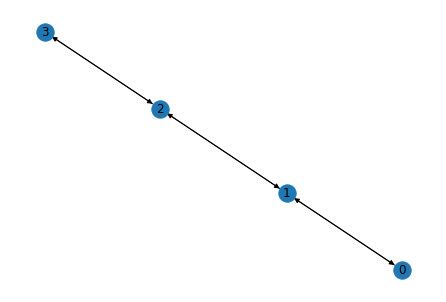

In [8]:
num_nodes=4

G=nx.DiGraph(nx.path_graph(num_nodes))
nx.draw(G, with_labels=True)

pr=nx.pagerank(G,alpha=0.8)
pr

In [9]:
%matplotlib inline
import torch
import networkx as nx
import matplotlib.pyplot as plt

# Visualization function for NX graph or PyTorch tensor
def visualize(h, color, epoch=None, loss=None):
    plt.figure(figsize=(7,7))
    plt.xticks([])
    plt.yticks([])

    if torch.is_tensor(h):
        h = h.detach().cpu().numpy()
        plt.scatter(h[:, 0], h[:, 1], s=140, c=color, cmap="Set2")
        if epoch is not None and loss is not None:
            plt.xlabel(f'Epoch: {epoch}, Loss: {loss.item():.4f}', fontsize=16)
    else:
        nx.draw_networkx(G, pos=nx.spring_layout(G, seed=42), with_labels=False,
                         node_color=color, cmap="Set2")
    plt.show()

In [10]:
from torch_geometric.datasets import KarateClub

dataset=KarateClub()
print('Dataset {}'.format(dataset))
print()
print('Number of Graphs {}'.format(len(dataset)))
print('Number of features {}'.format(dataset.num_features))
print('Number of classes {}'.format(dataset.num_classes))

Dataset KarateClub()

Number of Graphs 1
Number of features 34
Number of classes 4


In [11]:
data=dataset[0]
print(data)
print()

print('Number of nodes {}'.format(data.num_nodes))
print('Number of edges {}'.format(data.num_edges))
print('Average node degree {}'.format(data.num_edges/data.num_nodes))
print('Number of training nodes {}'.format(data.train_mask.sum()))
print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
print(f'Contains isolated nodes: {data.contains_isolated_nodes()}')
print(f'Contains self-loops: {data.contains_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')

Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])

Number of nodes 34
Number of edges 156
Average node degree 4.588235294117647
Number of training nodes 4
Training node label rate: 0.12
Contains isolated nodes: False
Contains self-loops: False
Is undirected: True


/Users/mohit/opt/anaconda3/envs/exp_pytorch_only/lib/python3.7/site-packages/torch_geometric/deprecation.py:12: UserWarning: 'contains_isolated_nodes' is deprecated, use 'has_isolated_nodes' instead
  warnings.warn(out)
/Users/mohit/opt/anaconda3/envs/exp_pytorch_only/lib/python3.7/site-packages/torch_geometric/deprecation.py:12: UserWarning: 'contains_self_loops' is deprecated, use 'has_self_loops' instead
  warnings.warn(out)


In [12]:
print(data)

Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])


In [13]:
edge_index=data.edge_index
print(edge_index.t())

tensor([[ 0,  1],
        [ 0,  2],
        [ 0,  3],
        [ 0,  4],
        [ 0,  5],
        [ 0,  6],
        [ 0,  7],
        [ 0,  8],
        [ 0, 10],
        [ 0, 11],
        [ 0, 12],
        [ 0, 13],
        [ 0, 17],
        [ 0, 19],
        [ 0, 21],
        [ 0, 31],
        [ 1,  0],
        [ 1,  2],
        [ 1,  3],
        [ 1,  7],
        [ 1, 13],
        [ 1, 17],
        [ 1, 19],
        [ 1, 21],
        [ 1, 30],
        [ 2,  0],
        [ 2,  1],
        [ 2,  3],
        [ 2,  7],
        [ 2,  8],
        [ 2,  9],
        [ 2, 13],
        [ 2, 27],
        [ 2, 28],
        [ 2, 32],
        [ 3,  0],
        [ 3,  1],
        [ 3,  2],
        [ 3,  7],
        [ 3, 12],
        [ 3, 13],
        [ 4,  0],
        [ 4,  6],
        [ 4, 10],
        [ 5,  0],
        [ 5,  6],
        [ 5, 10],
        [ 5, 16],
        [ 6,  0],
        [ 6,  4],
        [ 6,  5],
        [ 6, 16],
        [ 7,  0],
        [ 7,  1],
        [ 7,  2],
        [ 

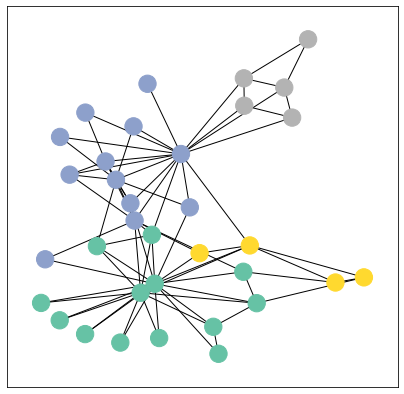

In [14]:
from torch_geometric.utils import to_networkx

G=to_networkx(data,to_undirected=True)
visualize(G,color=data.y)

In [15]:
from torch.nn import Linear
from torch_geometric.nn import GCNConv

class GCN(torch.nn.Module):
    def __init__(self):
        super(GCN,self).__init__()
        torch.manual_seed(12345)
        self.conv1=GCNConv(dataset.num_features, 4)
        self.conv2=GCNConv(4,4)
        self.conv3=GCNConv(4,2)
        self.classifier=Linear(2,dataset.num_classes)
    
    def forward(self, x, edge_index):
        h=self.conv1(x,edge_index)
        h=h.tanh()
        h=self.conv2(h,edge_index)
        h=h.tanh()
        h=self.conv3(h,edge_index)
        h=h.tanh()
        
        
        out=self.classifier(h)
        
        return out,h
    
model=GCN()
print(model)

GCN(
  (conv1): GCNConv(34, 4)
  (conv2): GCNConv(4, 4)
  (conv3): GCNConv(4, 2)
  (classifier): Linear(in_features=2, out_features=4, bias=True)
)


In [16]:
# print(data.x.shape)
# print(data.edge_index)
# print(data.y)

In [19]:
print(data.x.shape)


torch.Size([34, 34])


In [20]:
data.y.shape

torch.Size([34])

In [21]:
data.edge_index.shape

torch.Size([2, 156])

In [28]:
print(data.edge_index.shape)

torch.Size([2, 156])


In [26]:
print(edge_index.t())

tensor([[ 0,  1],
        [ 0,  2],
        [ 0,  3],
        [ 0,  4],
        [ 0,  5],
        [ 0,  6],
        [ 0,  7],
        [ 0,  8],
        [ 0, 10],
        [ 0, 11],
        [ 0, 12],
        [ 0, 13],
        [ 0, 17],
        [ 0, 19],
        [ 0, 21],
        [ 0, 31],
        [ 1,  0],
        [ 1,  2],
        [ 1,  3],
        [ 1,  7],
        [ 1, 13],
        [ 1, 17],
        [ 1, 19],
        [ 1, 21],
        [ 1, 30],
        [ 2,  0],
        [ 2,  1],
        [ 2,  3],
        [ 2,  7],
        [ 2,  8],
        [ 2,  9],
        [ 2, 13],
        [ 2, 27],
        [ 2, 28],
        [ 2, 32],
        [ 3,  0],
        [ 3,  1],
        [ 3,  2],
        [ 3,  7],
        [ 3, 12],
        [ 3, 13],
        [ 4,  0],
        [ 4,  6],
        [ 4, 10],
        [ 5,  0],
        [ 5,  6],
        [ 5, 10],
        [ 5, 16],
        [ 6,  0],
        [ 6,  4],
        [ 6,  5],
        [ 6, 16],
        [ 7,  0],
        [ 7,  1],
        [ 7,  2],
        [ 

Embedding Shape [34, 2]


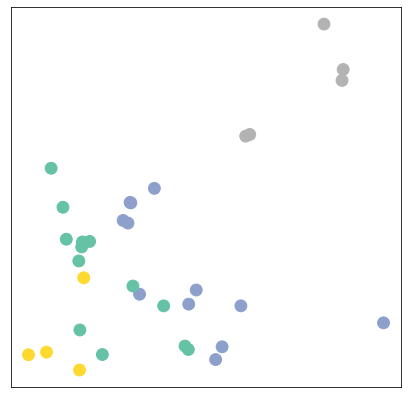

In [17]:
_, h =model(data.x, data.edge_index)
print('Embedding Shape {}'.format(list(h.shape)))

visualize(h,color=data.y)

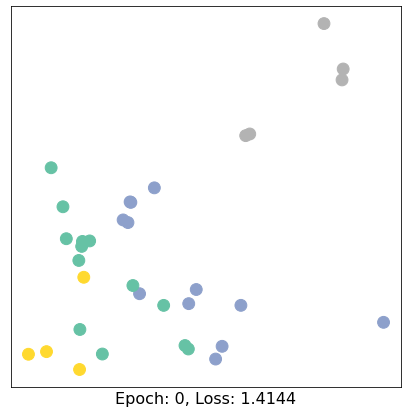

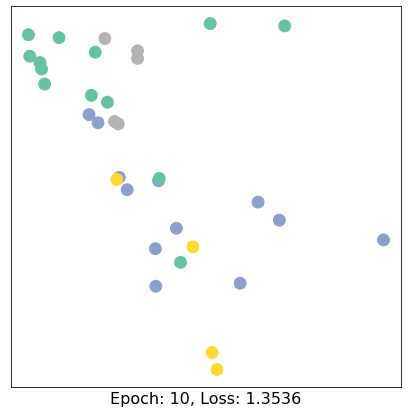

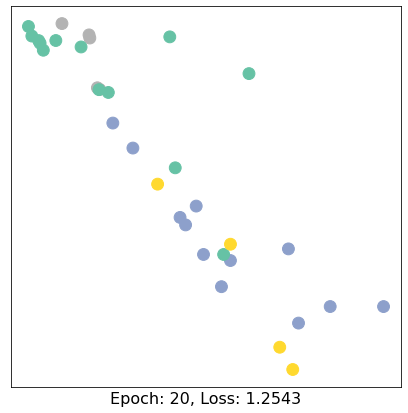

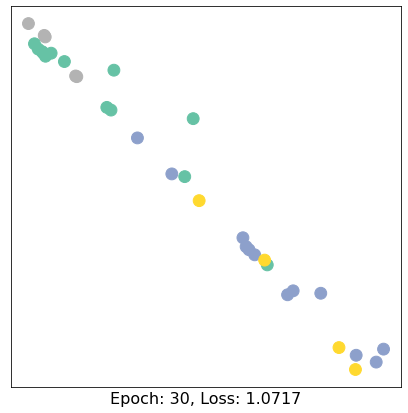

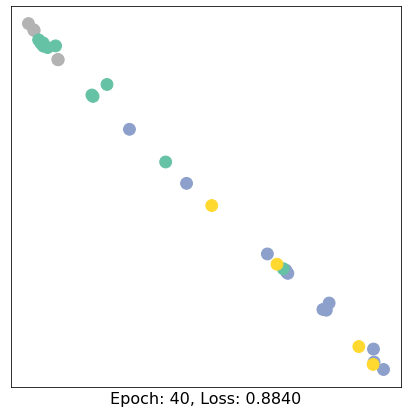

In [74]:
import time

model=GCN()
criterion=torch.nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

def train(data):
    optimizer.zero_grad()
    out,h=model(data.x, data.edge_index)
    loss=criterion(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    return loss, h

for epoch in range(41):
    loss, h = train(data)
    
    if epoch%10==0:
        visualize(h, color=data.y, epoch=epoch, loss=loss)
        time.sleep(0.3)